<a href="https://colab.research.google.com/github/gulmert89/dsBootcamp/blob/master/odev94_hierarchical_agglo_clust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.4 - Kümeleme Algoritmaları: Hiyerarşik Kümeleme
## Ödev:
Bu ödevde, UC Irvine Machine Learning Repository'de bulunan [kalp hastalığı verisi](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) ile çalışacaksınız.

Veri setini kullanmadan önce bazı ön işlemler yapmanız gerekiyor:

<code># Define the features and the outcome<br>
X = heartdisease_df.iloc[:, :13]<br>
y = heartdisease_df.iloc[:, 13]<br></code>

<code># Replace missing values (marked by ?) with a 0<br>
X = X.replace(to_replace='?', value=0)<br></code>

<code># Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis<br>
y = np.where(y > 0, 0, 1)<br></code>

Burada, X sizin özellikleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, o zaman buna karşılık gelen hastanın kalp hastalığı olduğunu ve y'nin 0'a eşit olması durumunda, hastanın kalp hastalığı olmadığı anlaşılacaktır.

Ödevi tamamlamak için aşağıdaki soruların cevabını içeren Jupyter notebook'u sisteme yükleyiniz:

1) Üç farklı linkage yöntemini kullanarak kalp hastalığı veri kümesi için dendrogramlar üretin: “mean”, “complete” ve “ward”. Sizce hangi bağlantı yöntemi daha iyi sonuç vermektedir?

2) n_clusters = 2 ayarını yaparak kalp hastalığı verilerine yığınsal kümeleme uygulayın. Yukarıdaki üç bağlantı yöntemini deneyin ve her bir çözümünüz için ARI ve siluet skorları elde edin. Sonuçları birbirleriyle ve önceki bölümde uyguladığınız k-ortalama çözümü ile karşılaştırın. Hangi algoritma ve ayar daha iyi performans gösterir?

---
---
---
## Soru 1

In [1]:
# mounting the Google Drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
path = "/content/drive/My Drive/MertColab/odevler/Cleveland.data"
heart_disease = pd.read_csv(path, sep=",", names=columns)
del columns, path

In [4]:
heart_disease.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  num      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
# preprocess
x1 = heart_disease.iloc[:, :13]
y1 = heart_disease.iloc[:, 13]

x1 = x1.replace(to_replace="?", value=0)
x1 = x1.astype("float64")
y1 = np.where(y1>0, 1, 0)

scaler = StandardScaler()
x1_std = scaler.fit_transform(x1)

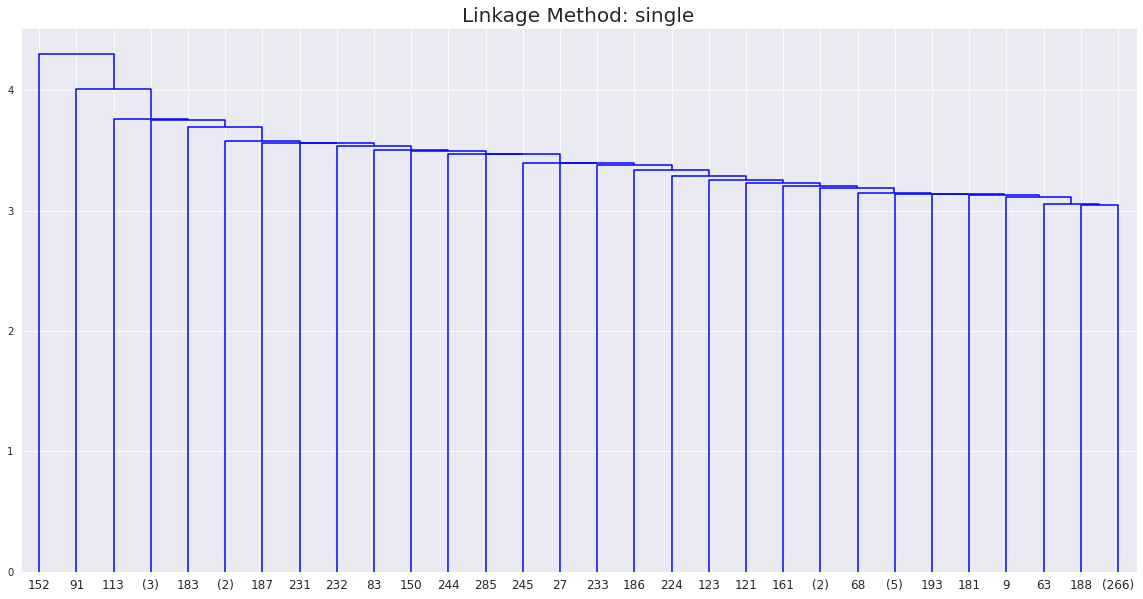

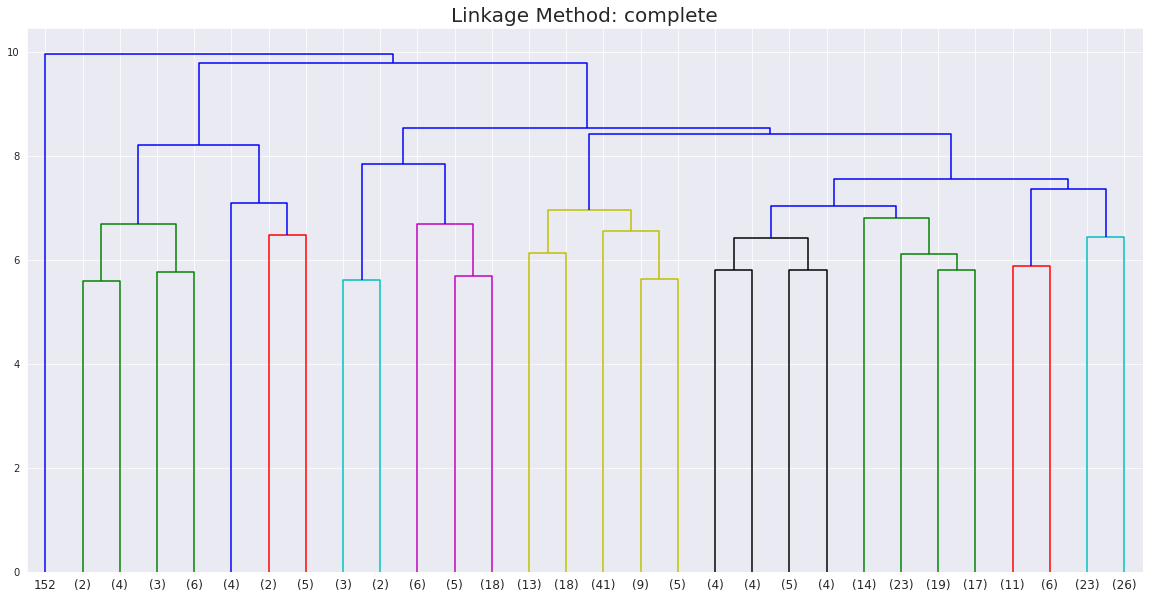

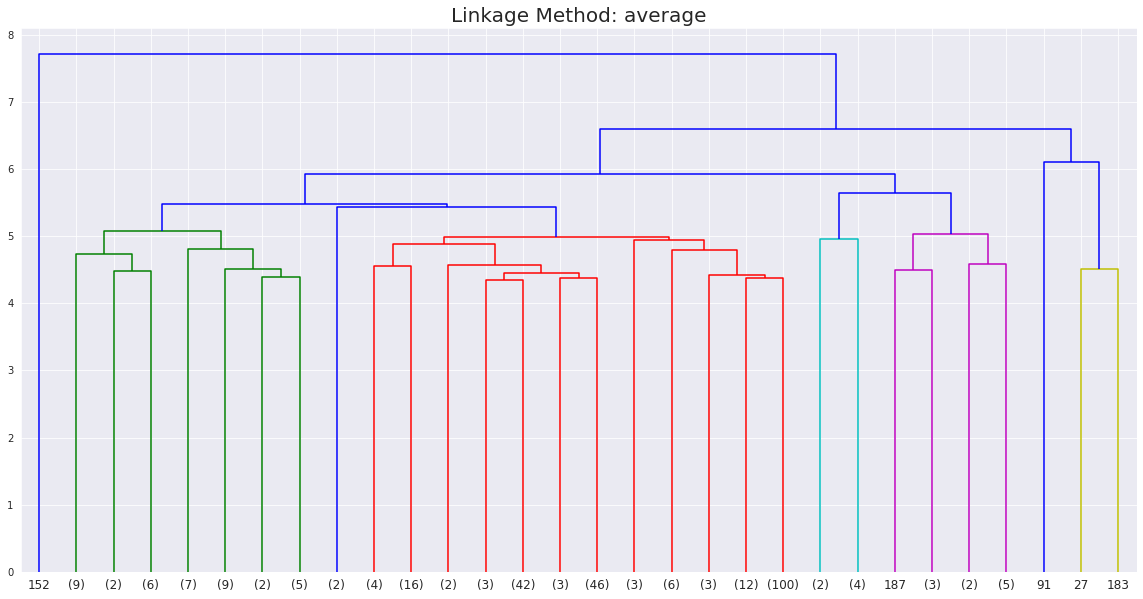

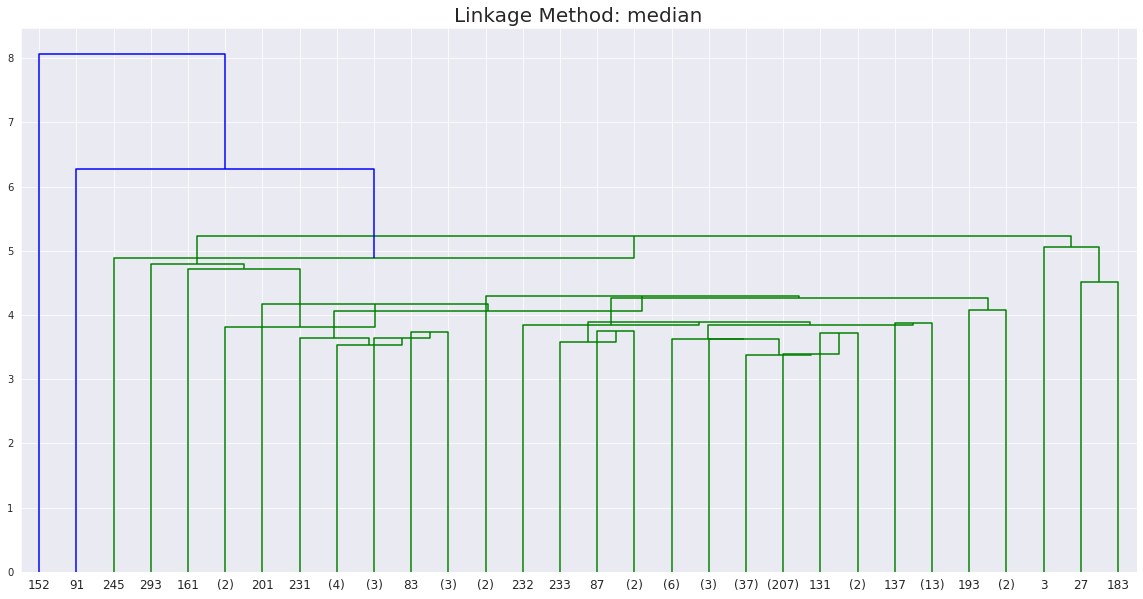

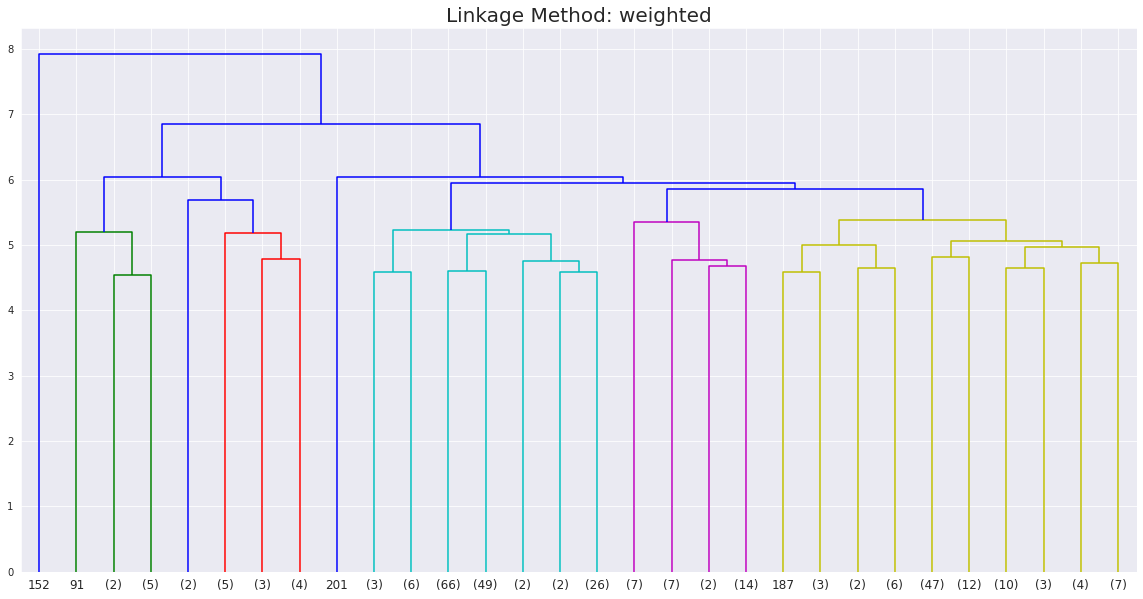

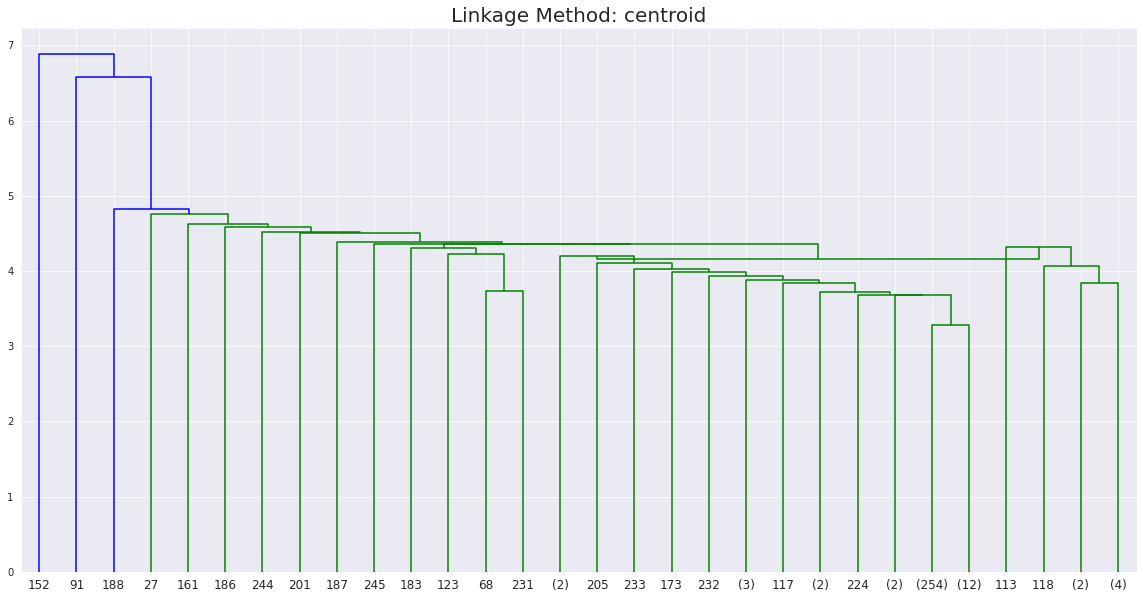

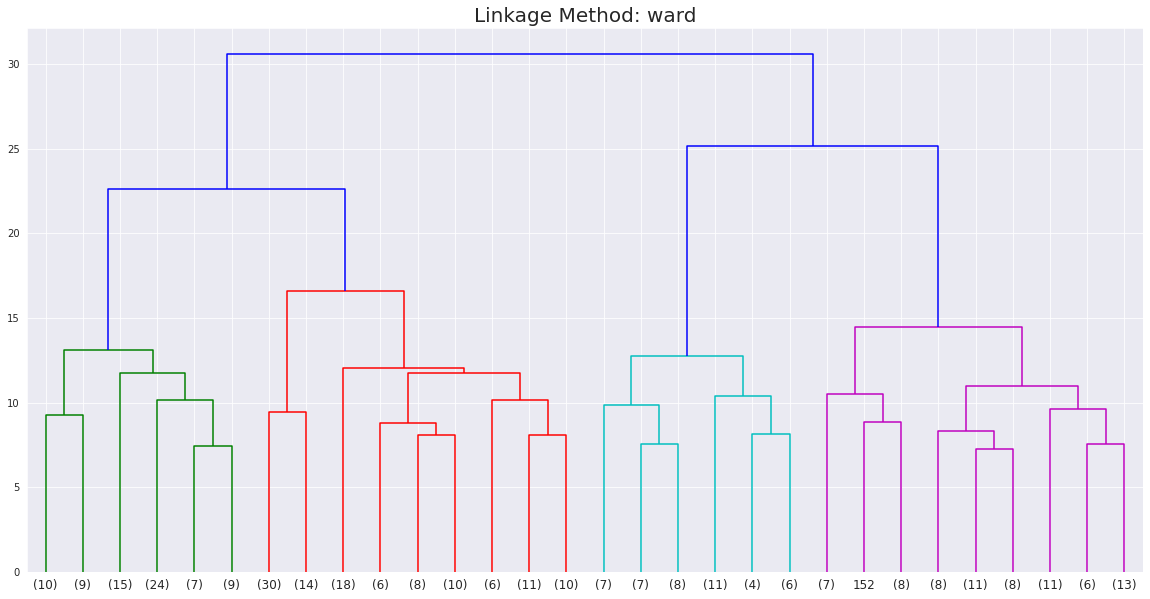

In [7]:
linkage_methods = ["single", "complete", "average", "median", 
                   "weighted", "centroid", "ward"]
for method in linkage_methods:
    plt.figure(figsize=(20,10))
    plt.title(f"Linkage Method: {method}", size=20)
    Z = linkage(x1_std, method=method)
    dendrogram(Z, truncate_mode="lastp", 
               leaf_font_size=12, leaf_rotation=0)
    plt.show()

**Yorum:**
"ward" bağlantı yöntemi, aşırı değerler ile iyi bir şekilde baş ederek daha homojen bir kümeleme performansı sergilemiştir.

\## Bu bağlantı yöntemlerinin sanırım gerçek hayatta kullanıldığı yerler değişkenlik gösteriyor. Mesela biyolojide sıklıkla kullanılan bağlantı yöntemi var; şimdi hatırlayamadım hangisi, diyelim ki "single". Bunların gerçek hayattaki kullanımları üzerine örnekler ile tartışabilir miyiz bilginiz varsa? Veya ne zaman hangisini seçtiğimiz üzerine?

***
## Soru 2:

In [8]:
linkage_methods = ["ward", "complete", "average", "single"]
affinity_metrics = ["euclidean", "manhattan", "cosine"]

scores_df = pd.DataFrame(columns=["AR Score", "Silhouette Score", 
                                  "Affinity", "Linkage Method"])

print(f"------With 'euclidean' affinity:------")
for affinity in affinity_metrics:
    for method in linkage_methods:
        try:            
            agg_model = AgglomerativeClustering(n_clusters=2,
                                                affinity=affinity,
                                                linkage=method)
            cluster_predict = agg_model.fit_predict(x1_std)
            silhouette = metrics.silhouette_score(X=x1_std, 
                                                labels=cluster_predict, 
                                                metric=affinity)
            ari_value = metrics.adjusted_rand_score(y1, cluster_predict)
            scores_df = scores_df.append({"Silhouette Score":silhouette, 
                                          "AR Score":ari_value, 
                                          "Affinity":affinity, 
                                          "Linkage Method":method},
                                         ignore_index=True
                                         )
            if affinity == "euclidean":
                print(f"Silhouette score with '{method}' method: {silhouette:.3f}")
                print(f"Adjusted Rand score with '{method}' method: {ari_value:.3f}\n")
            else:
                pass
        except:
            pass
print("\nRemember that for k-means model,")
print(f"Silhouette score    : 0.438")
print(f"Adjusted Rand score : 0.175")

------With 'euclidean' affinity:------
Silhouette score with 'ward' method: 0.139
Adjusted Rand score with 'ward' method: 0.146

Silhouette score with 'complete' method: 0.348
Adjusted Rand score with 'complete' method: -0.001

Silhouette score with 'average' method: 0.348
Adjusted Rand score with 'average' method: -0.001

Silhouette score with 'single' method: 0.348
Adjusted Rand score with 'single' method: -0.001


Remember that for k-means model,
Silhouette score    : 0.438
Adjusted Rand score : 0.175


**Yorum:**
"ward" bağlantı yöntemi ile skorlar pozitif değerdedir. Adjusted Rand indeksi "ward" bağlantı yönteminde, Silhouette skoru ise "complete" bağlantı yönteminde en yüksek değerdedir. Yola ward ile devam etmek, akıllı bir seçim olacaktır. Yine de skorlara baktığımızda, k-means modelini uygulamak, hiyerarşik yığınsal kümeleme modelini kullanmaktan daha mantıklıdır.

### Bonus Statistics:

In [9]:
print("-----Best 10 Silhouette Score-----")
scores_df.sort_values(by="Silhouette Score", ascending=False).head(10)

-----Best 10 Silhouette Score-----


,AR Score,Silhouette Score,Affinity,Linkage Method
1,-0.001006,0.348362,euclidean,complete
2,-0.001006,0.348362,euclidean,average
3,-0.001006,0.348362,euclidean,single
6,0.001187,0.319239,manhattan,single
5,-0.001006,0.239465,manhattan,average
8,0.294049,0.233255,cosine,average
4,0.370707,0.199795,manhattan,complete
7,0.213940,0.190026,cosine,complete
0,0.146130,0.138720,euclidean,ward
9,0.001187,-0.021328,cosine,single


In [10]:
print("-----Best 10 Adjusted Rand Score-----")
scores_df.sort_values(by="AR Score", ascending=False).head(10)

-----Best 10 Adjusted Rand Score-----


,AR Score,Silhouette Score,Affinity,Linkage Method
4,0.370707,0.199795,manhattan,complete
8,0.294049,0.233255,cosine,average
7,0.213940,0.190026,cosine,complete
0,0.146130,0.138720,euclidean,ward
6,0.001187,0.319239,manhattan,single
9,0.001187,-0.021328,cosine,single
1,-0.001006,0.348362,euclidean,complete
2,-0.001006,0.348362,euclidean,average
3,-0.001006,0.348362,euclidean,single
5,-0.001006,0.239465,manhattan,average


In [11]:
print("-----Min & Max Scores w.r.t Linkage Methods-----\n")
scores_df.groupby("Linkage Method").agg({"AR Score":[min, max], 
                                         "Silhouette Score":[min, max]}
                                        )

-----Min & Max Scores w.r.t Linkage Methods-----



AR Score           Silhouette Score          
                     min       max              min       max
Linkage Method                                               
average        -0.001006  0.294049         0.233255  0.348362
complete       -0.001006  0.370707         0.190026  0.348362
single         -0.001006  0.001187        -0.021328  0.348362
ward            0.146130  0.146130         0.138720  0.138720

In [12]:
print("-----Min & Max Scores w.r.t Affinities-----\n")
scores_df.groupby("Affinity").agg({"AR Score":[min, max], 
                                         "Silhouette Score":[min, max]}
                                        )

-----Min & Max Scores w.r.t Affinities-----



AR Score           Silhouette Score          
                min       max              min       max
Affinity                                                
cosine     0.001187  0.294049        -0.021328  0.233255
euclidean -0.001006  0.146130         0.138720  0.348362
manhattan -0.001006  0.370707         0.199795  0.319239